<a href="https://colab.research.google.com/github/Jaydnxs/pksim/blob/main/TRABAJO_L_P_II_EDICI%C3%93N_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas

#¡BIENVENIDO A PokeText!


En este asombroso y de poco presupuesto RPG multijugador local, te adentrarás en el mundo de Pokemon: Legends Arceus en una aventura textual, en donde tus decisiones podrían determinar si te vuelves el mayor coleccionador de pokemons o mueres en el intento.

Integrantes:
Diaz Guerra, Luziana Yzel

Durand Lícito, Adrián Rosmel

Y para concluir, el grandísimo Litten
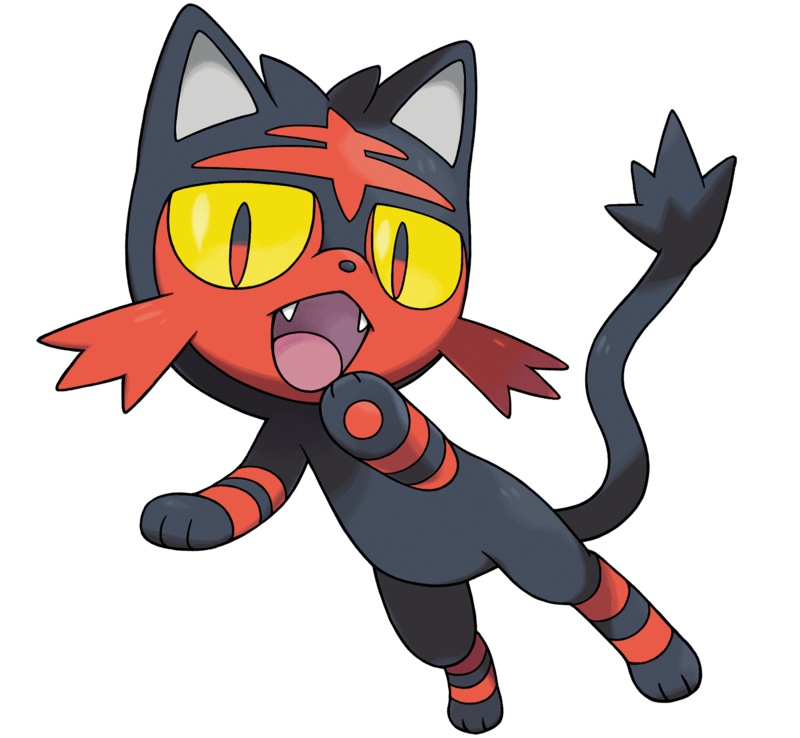

#CAMBIOS RESPECTO AL CÓDIGO PRESENTADO:

De manera breve, se modificó el tema del juego de un RPG simple a una versión simplificada de Pokemon, sin perder la esencia del RPG inicial. Los enemigos fueron reemplazados por los pokemons salvajes, así como los jugadores por entrenadores.

Se agregaron las funciones de captura pokemon, de enfrentamientos entre jugadores, de huir del combate, la opción de poder decidir tu destino en las batallas, el cambio de los pokemon y la implementación de 242 pokemon diferentes, cada uno con sus respectivas estadísticas.

Para esto se usó:

Excel: Para el scraping de los datos de los pokemon.

Github: Para el almacenaje de la base de datos.

Youtube, Reddit y Geekforgeeks: Para el aprendizaje acerca de la elaboración de algunas funciones.

Visual Studio Code: Para la programación de manera más cómoda.

Google Colab: Para la presentación y pulido final del proyecto.

Todo esto para poder elaborar el proyecto de manera más compleja y completa.

Si desea ver el código original, puede desplazarse hacia la parte de abajo.

Dicho todo esto, espero se divierta jugando.

In [ ]:
##Importamos la data de gitub
!git clone "https://github.com/Jaydnxs/pksim"
#Importamos las librerías que se usan
import pandas as pd #Para los datos de excel
import random #Para generar los eventos aleatorios
import json #Para manejar los datos en JSON
import os #Para interactuar con el sistema
# Definimos las listas
POKEMON_INICIALES = ["Litten", "Oshawott", "Rowlet"] #Lista de los pokemon iniciales que podemos seleccionar
MAX_JUGADORES = 2 #Número máx de jugadores
MIN_JUGADORES = 1 #Número mín de jugadores
POKEMON_LISTA = {} #Diccionario para datos de cada pokemon
# Función para cargar los datos de pokemons desde un archivo Excel
def cargar_pokemon():
    global POKEMON_LISTA #Hace que se pueda modificar el diccionario
    df = pd.read_excel("/content/pksim/pokemon_data.xlsx") #lee los datos del excel
    for _, row in df.iterrows(): #Hace iteración en cada fila del excel
        nombre = row["Nombre"] #Extrae el nombre del pokemon
        #Almacena los atributos del Pokemon en el diccionario
        POKEMON_LISTA[nombre] = {
            "salud": row["Salud"],
            "ataque": row["Ataque"],
            "defensa": row["Defensa"],
            "nivel_evolucion": row["Nivel_Evolucion"],
            "evolucion": row["Evolucion"] if not pd.isna(row["Evolucion"]) else None
        }
# Función para elegir el pokemon inicial
def elegir_pokemon_inicial():
    print("Elige tu Pokémon inicial:")
    for i, pokemon in enumerate(POKEMON_INICIALES, 1): #enumera las opciones
        print(f"{i}. {pokemon}")
    eleccion = int(input("Ingresa el número de tu elección: ")) - 1
    nombre_pokemon = POKEMON_INICIALES[eleccion]
    #Crea un objeto del pokemon que eliges
    pokemon = Pokemon(nombre_pokemon, **POKEMON_LISTA[nombre_pokemon])
    print(f"Has elegido a {nombre_pokemon} como tu Pokémon inicial.")
    return pokemon #guarda al pokemon elegido
# Clase pokemon con la función para subir nivel, atacar y evolucionar
class Pokemon:
    #inicia un objeto con los atributos
    def __init__(self, nombre, salud, ataque, defensa, nivel=1, nivel_evolucion=None, evolucion=None):
        self.nombre = nombre
        self.salud = salud
        self.ataque = ataque
        self.defensa = defensa
        self.nivel = nivel
        self.nivel_evolucion = nivel_evolucion
        self.evolucion = evolucion
        self.experiencia = 0 #Inician en 0 para poder subir poco a poco por combates

    #Para atacar a otro pokemon
    def ataque_pokemon(self, objetivo):
        dano = max(self.ataque - objetivo.defensa, 1)  #Asegura de que el daño sea al menos 1
        objetivo.salud -= dano #reduce
        print(f"{self.nombre} ataca a {objetivo.nombre} causando {dano} puntos de daño. Salud de {objetivo.nombre}: {objetivo.salud}")
    #Para subir nivel
    def subir_nivel(self):
        self.nivel += 1 #aumenta el nivel
        self.salud += 5 #aumenta la salud
        self.ataque += 2 #aumenta ataque
        self.defensa += 1 #Aumenta defensa
        print(f"{self.nombre} ha subido al nivel {self.nivel}! Salud: {self.salud}, Ataque: {self.ataque}, Defensa: {self.defensa}")
        self.intentar_evolucionar() #evoluciona si se puede
    #Para ganar experiencia y subir nivel si se puede
    def ganar_experiencia(self, exp_ganada):
        self.experiencia += exp_ganada
        if self.experiencia >= 10 * self.nivel:
            self.experiencia -= 10 * self.nivel
            self.subir_nivel()
    #Para ver si puede evolucionar
    def intentar_evolucionar(self):
        if self.evolucion and self.nivel >= self.nivel_evolucion:
            print(f"{self.nombre} está evolucionando a {self.evolucion}!")
            self.evolucionar()
    #Para evolucionar
    def evolucionar(self):
        datos_evolucion = POKEMON_LISTA[self.evolucion] #obtiene los datos de la evo
        self.nombre = self.evolucion #cambia el nombre
        self.salud = datos_evolucion["salud"] #Actualiza las stats
        self.ataque = datos_evolucion["ataque"]
        self.defensa = datos_evolucion["defensa"]
        self.nivel_evolucion = datos_evolucion["nivel_evolucion"]
        self.evolucion = datos_evolucion["evolucion"]
        print(f"¡Tu Pokémon ha evolucionado a {self.nombre}!")
#Para cambiar los pokemon
class Entrenador:
    def __init__(self, nombre):
        self.nombre = nombre
        self.equipo = [elegir_pokemon_inicial()] #Inicia el equipo con el inicial
        self.pokemon_actual = self.equipo[0] #Se pone como pokemon actual
    #Captura al pokemon si hay espacio
    def capturar_pokemon(self, pokemon):
        if len(self.equipo) < 6:
            self.equipo.append(pokemon)
            print(f"{self.nombre} ha capturado a {pokemon.nombre}.")
        else:
            print("Equipo completo, no puedes capturar más Pokémon.")
    #Cambia al pokemon actual por otro
    def cambiar_pokemon(self):
        print("Selecciona el Pokémon para cambiar:")
        for i, pokemon in enumerate(self.equipo, 1): #numera tus pokemons
            print(f"{i}. {pokemon.nombre} (Nivel {pokemon.nivel}) - Salud: {pokemon.salud}")
        eleccion = int(input("Ingresa el número del Pokémon: ")) - 1 #Recoge la elección
        if self.equipo[eleccion].salud > 0: #lo cambia por un pokemon vivo
            self.pokemon_actual = self.equipo[eleccion]
            print(f"{self.nombre} ha cambiado a {self.pokemon_actual.nombre}.")
        else:
            print("Ese Pokémon está debilitado y no puede pelear.")
    #Convierte los datos para guardar
    def to_dict(self):
        return {
            "nombre": self.nombre,
            "equipo": [
                {
                    "nombre": p.nombre,
                    "salud": p.salud,
                    "ataque": p.ataque,
                    "defensa": p.defensa,
                    "nivel": p.nivel,
                    "experiencia": p.experiencia,
                    "nivel_evolucion": p.nivel_evolucion,
                    "evolucion": p.evolucion,
                } for p in self.equipo
            ],
            "pokemon_actual": self.equipo.index(self.pokemon_actual),
        }
    #crea el objeto del personaje
    @classmethod
    def from_dict(cls, data):
        entrenador = cls(data["nombre"])
        entrenador.equipo = [
            Pokemon(p["nombre"], p["salud"], p["ataque"], p["defensa"], p["nivel"], p["nivel_evolucion"], p["evolucion"])
            for p in data["equipo"]
        ]
        entrenador.pokemon_actual = entrenador.equipo[data["pokemon_actual"]]
        return entrenador
#Guarda la partida en un JSON
def guardar_partida(jugadores):
    with open("partida_guardada.json", "w") as archivo:
        json.dump([jugador.to_dict() for jugador in jugadores], archivo)
    print("Partida guardada exitosamente.")
#Carga la partida del JSON
def cargar_partida():
    if not os.path.exists("partida_guardada.json"): #Comprueba si existe partida
        print("No hay una partida guardada.")
        return None
    with open("partida_guardada.json", "r") as archivo:
        data = json.load(archivo)
    return [Entrenador.from_dict(jugador) for jugador in data] #Carga los datos
#Inicia nueva partida
def nueva_partida():
    num_jugadores = int(input("Número de jugadores (1 o 2): "))
    return [Entrenador(input(f"Nombre del jugador {i+1}: ")) for i in range(num_jugadores)]

#Función para enfrentamiento entre entrenadores
def enfrentamiento(jugador1, jugador2):
    print(f"\n¡{jugador1.nombre} y {jugador2.nombre} están listos para pelear!")
    while jugador1.pokemon_actual.salud > 0 and jugador2.pokemon_actual.salud > 0:
        jugador1.pokemon_actual.ataque_pokemon(jugador2.pokemon_actual)
        if jugador2.pokemon_actual.salud <= 0:
            print(f"{jugador1.nombre} ha ganado la batalla.")
            return
        jugador2.pokemon_actual.ataque_pokemon(jugador1.pokemon_actual)
        if jugador1.pokemon_actual.salud <= 0:
            print(f"{jugador2.nombre} ha ganado la batalla.")
            return
#Para cuando mueren todos los pokemon
def equipo_derrotado(entrenador):
    return all(pokemon.salud <= 0 for pokemon in entrenador.equipo)
#Para las batallas
def evento_batalla(entrenador):
    pokemon_salvaje = Pokemon(random.choice(list(POKEMON_LISTA.keys())), **POKEMON_LISTA[random.choice(list(POKEMON_LISTA.keys()))]) #Te aparece un pokemon random
    print(f"¡Un {pokemon_salvaje.nombre} salvaje ha aparecido!")
    batalla_activa = True #Para que termine cuando se rompa el bucle
    #Para el menú de opciones de la batalla
    while batalla_activa:
        accion = input("¿Qué quieres hacer? (Atacar / Capturar / Cambiar / Huir): ").lower()
        #Para atacar
        if accion == "atacar":
            entrenador.pokemon_actual.ataque_pokemon(pokemon_salvaje)
            if pokemon_salvaje.salud <= 0:
                print(f"¡Has derrotado al {pokemon_salvaje.nombre}!")
                entrenador.pokemon_actual.ganar_experiencia(5)
                batalla_activa = False
            else: #Este es por si se muere los pokemon del jugador
                pokemon_salvaje.ataque_pokemon(entrenador.pokemon_actual)
                if entrenador.pokemon_actual.salud <= 0:
                    print(f"¡{entrenador.pokemon_actual.nombre} ha sido derrotado!")
                    if equipo_derrotado(entrenador):
                        print(f"Todos los Pokémon de {entrenador.nombre} han sido derrotados. ¡Has perdido!")
                        return  #Termina si todos los Pokémon están muertos
                    batalla_activa = False
        #Para capturar
        elif accion == "capturar":
            if random.randint(1, 100) > 50:  # 50% de probabilidad de captura
                entrenador.capturar_pokemon(pokemon_salvaje)
                batalla_activa = False
            else:
                print(f"{pokemon_salvaje.nombre} se ha escapado.")
        #Para cambiar el pokemon
        elif accion == "cambiar":
            entrenador.cambiar_pokemon()
        #Para huir del combate
        elif accion == "huir":
            print("¡Has huido de la batalla!")
            batalla_activa = False
#Iniciar el juego
def iniciar_juego():
    cargar_pokemon() #Carga los datos
    print("¿Quieres cargar una partida guardada? (s/n): ")
    if input().lower() == "s":
        jugadores = cargar_partida() #Carga la partida
        if not jugadores:
            return
    else:
        jugadores = nueva_partida() #Inicia nueva partida
    #Este es para el juego
    juego_activo = True
    while juego_activo:
        for jugador in jugadores: #Los eventos, o sea, batallas
            evento_batalla(jugador)
            if input("¿Guardar partida? (s/n): ").lower() == "s":
                guardar_partida(jugadores)
        if len(jugadores) > 1 and input("¿Desean enfrentarse? (s/n): ").lower() == "s": #Para nfrentar
            enfrentamiento(jugadores[0], jugadores[1])
        if input("¿Quieres continuar jugando? (s/n): ").lower() != "s": #Para seguir jugando
            juego_activo = False
#Inicia todo
iniciar_juego()

In [ ]:
import random
#Se cambió el número de jugadores para un número más sencillo de trabajar
MAX_JUGADORES = 4
MIN_JUGADORES = 1
#Se eliminaron las armas y armaduras por el cambio de temática
EVENTOS = ["enemigo", "arma", "armadura", "nada"] #Los eventos cambiaron a batallas
ARMAS = {"Espada": 5, "Hacha": 7, "Lanza": 6}
ARMADURAS = {"Escudo": 5, "Armadura ligera": 7, "Armadura pesada": 10}
#La clase jugador fue reemplazada por la del pokemon
class Jugador:
    def __init__(self, nombre):
        self.nombre = nombre
        self.salud = 100
        self.dano = 10
        self.defensa = 5
        self.arma = None
        self.armadura = None
    #Se reemplazaron las siguientes acciones por las acciones de atacar, capturar, cambiar y huir
    def recoger_arma(self, arma):
        self.arma = arma
        self.dano += ARMAS[arma]
        print(f"{self.nombre} ha encontrado un {arma} y ahora tiene {self.dano} de daño.")
    def recoger_armadura(self, armadura):
        self.armadura = armadura
        self.defensa += ARMADURAS[armadura]
        print(f"{self.nombre} ha encontrado una {armadura} y ahora tiene {self.defensa} de defensa.")
    def atacar(self, enemigo):
        dano_real = self.dano - enemigo.defensa
        dano_real = max(dano_real, 0)  # Asegura que el daño no sea negativo
        enemigo.salud -= dano_real
        print(f"{self.nombre} ataca a {enemigo.nombre} causando {dano_real} de daño.")
    def recibir_dano(self, dano):
        dano_real = dano - self.defensa
        dano_real = max(dano_real, 0)
        self.salud -= dano_real
        print(f"{self.nombre} recibe {dano_real} de daño. Salud actual: {self.salud}")

#Se cambió la clase enemigo por la de otro pokemon
class Enemigo:
    NOMBRES_ENEMIGOS = [
        "Goblin", "Esqueleto", "Orco", "Troll", "Zombie",
        "Demonio", "Fantasma", "Hombre Lobo", "Draco", "Vampiro"
    ]
    def __init__(self):
        self.nombre = random.choice(self.NOMBRES_ENEMIGOS)
        self.salud = random.randint(20, 50)
        self.dano = random.randint(5, 15)
        self.defensa = random.randint(0, 5)
#Los eventos aleatorios fueron mantenidos, con el cambio de nombre y ciertas acciones
def evento_aleatorio(jugador):
    evento = random.choice(EVENTOS)
    if evento == "enemigo":
        enemigo = Enemigo()
        print(f"¡Un {enemigo.nombre} aparece! Salud: {enemigo.salud}, Daño: {enemigo.dano}, Defensa: {enemigo.defensa}")
        while enemigo.salud > 0 and jugador.salud > 0:
            jugador.atacar(enemigo)
            if enemigo.salud > 0:
                jugador.recibir_dano(enemigo.dano)
        if jugador.salud <= 0:
            print(f"{jugador.nombre} ha sido derrotado por el {enemigo.nombre}.")
        else:
            print(f"{jugador.nombre} ha derrotado al {enemigo.nombre}.")
    elif evento == "arma":
        arma = random.choice(list(ARMAS.keys()))
        jugador.recoger_arma(arma)
    elif evento == "armadura":
        armadura = random.choice(list(ARMADURAS.keys()))
        jugador.recoger_armadura(armadura)
    else:
        print(f"{jugador.nombre} no ha encontrado nada.")
#La configuración del juego se mantiene, pero con algunos agregados y modificaciones
def iniciar_juego():
    num_jugadores = int(input("Ingrese el número de jugadores (1-4): "))
    if num_jugadores < MIN_JUGADORES or num_jugadores > MAX_JUGADORES:
        print("Número de jugadores inválido. Intente de nuevo.")
        return
    jugadores = [Jugador(f"Jugador {i+1}") for i in range(num_jugadores)]
    juego_activo = True
    # Comenzar el juego
    turno = 1
    while juego_activo:
        print(f"\n--- Turno {turno} ---")
        for jugador in jugadores:
            if jugador.salud > 0:
                print(f"\n{jugador.nombre} tiene {jugador.salud} de salud, {jugador.dano} de daño y {jugador.defensa} de defensa.")
                evento_aleatorio(jugador)
                # Opción para continuar o salir
                seguir = input(f"{jugador.nombre}, ¿quieres continuar al siguiente turno? (enter/n): ").lower()
                if seguir != "":
                    print(f"{jugador.nombre} ha decidido retirarse del juego.")
                    jugador.salud = 0  # Establece salud a 0 para que no continúe en el próximo turno.
            else:
                print(f"{jugador.nombre} ha sido derrotado y no puede continuar.")
        # Chequear si todos los jugadores han sido derrotados
        if all(jugador.salud <= 0 for jugador in jugadores):
            print("Todos los jugadores han sido derrotados o se han retirado. ¡Juego terminado!")
            juego_activo = False
        else:
            turno += 1
# Ejecutar el juego
if __name__ == "__main__":
    iniciar_juego()